1. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import streamlit as st
import pickle

In [2]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
train_df.duplicated().sum()

0

In [10]:
test_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [11]:
test_df.duplicated().sum()

0

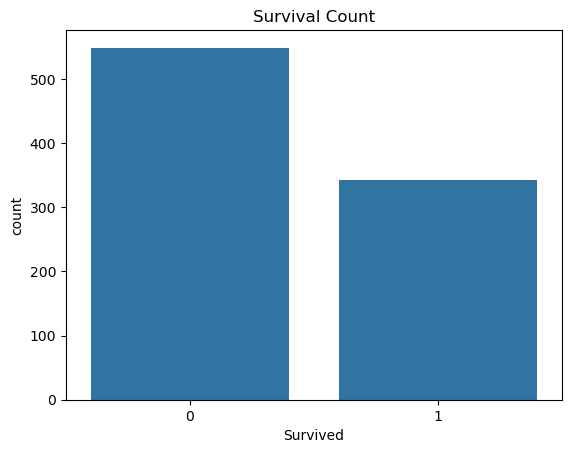

In [12]:
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count")
plt.show()

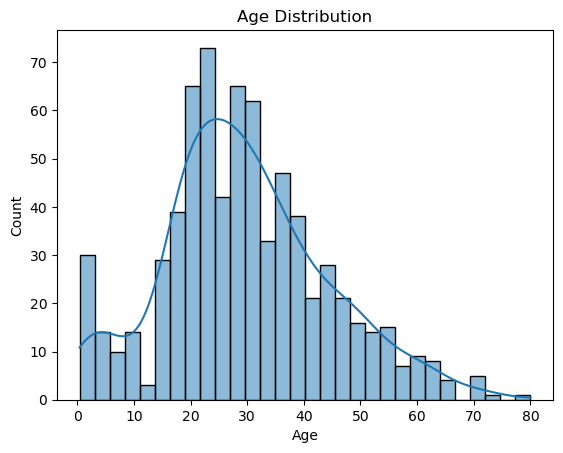

In [13]:
sns.histplot(train_df["Age"].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

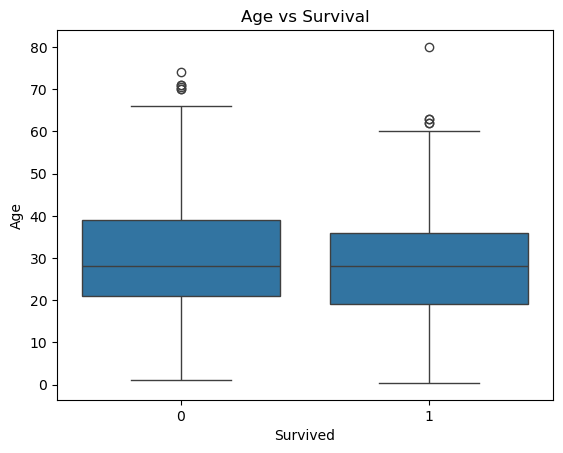

In [14]:
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.title("Age vs Survival")
plt.show()

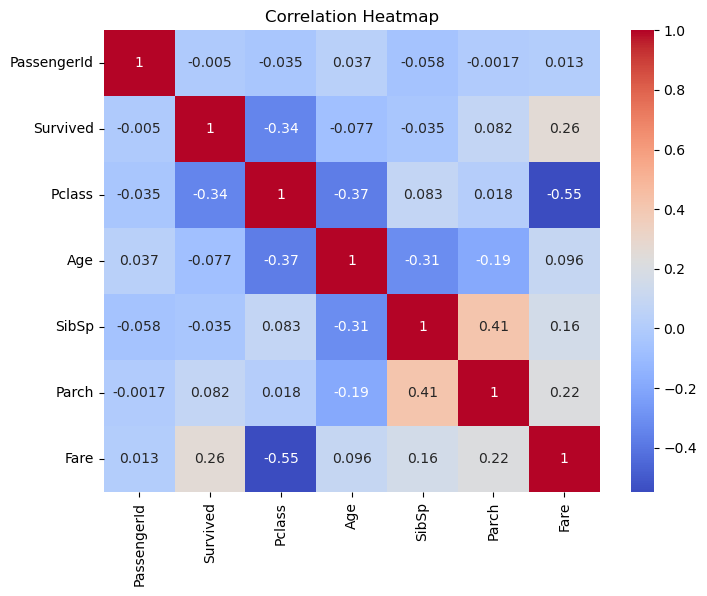

In [15]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

2. Data Preprocessing

In [16]:
# Handle missing values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11604\797586836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11604\797586836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [17]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11604\2386736551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11604\2386736551.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [18]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in ["Sex", "Embarked"]:
    train_df[col] = label_enc.fit_transform(train_df[col])
    test_df[col] = label_enc.transform(test_df[col])

In [19]:
# Feature selection
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

In [20]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

3. Model Building

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

4. Model Evaluation

In [22]:
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

In [23]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
ROC-AUC: 0.8818532818532818


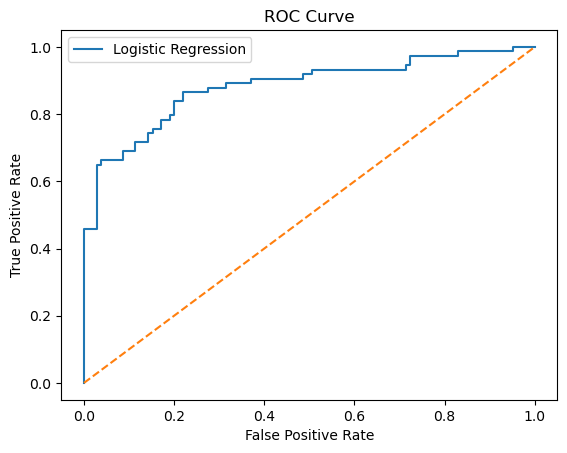

In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

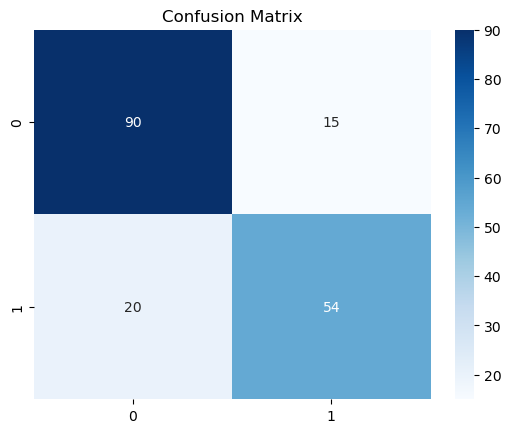

In [25]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

5. Interpretation

In [26]:
coef_df = pd.DataFrame({"Feature": features, "Coefficient": model.coef_[0]})
print("\nLogistic Regression Coefficients:")
print(coef_df.sort_values(by="Coefficient", ascending=False))


Logistic Regression Coefficients:
    Feature  Coefficient
5      Fare     0.121214
4     Parch    -0.100018
6  Embarked    -0.174770
3     SibSp    -0.328189
2       Age    -0.395757
0    Pclass    -0.792517
1       Sex    -1.285813


6. Deployment with Streamlit

In [27]:
# Save model and scaler
with open("titanic_model.pkl", "wb") as f:
    pickle.dump((model, scaler), f)